In [1]:
import sys
import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D
import numpy
import os
import glob

sys.path.append('/src')


In [2]:
from src.data import download_dataset
download_dataset()


Data already downloaded


In [3]:
from src.data import Dataset
dataset = Dataset([0.75, 0.125, 0.125], batch_size=20, num_features=3)

In [4]:
print('train on user indices: ', dataset.train_idxs)
print('validate on user indices: ', dataset.val_idxs)
print('test on user indices: ', dataset.test_idxs)

train on user indices:  [4 2 0 5 1 3]
validate on user indices:  [7]
test on user indices:  [6]


In [5]:
norm_val = False

data, cls, seq_len = dataset.get_padded_data_points_flat('train', normalize=norm_val)
data_val, cls_val, seq_len_val = dataset.get_padded_data_points_flat('val', normalize=norm_val)
data_test, cls_test, seq_len_test = dataset.get_padded_data_points_flat('test', normalize=norm_val)

In [6]:
print(data.shape, cls.shape)
print(data_val.shape, cls_val.shape)
print(data_test.shape, cls_test.shape)

(3360, 945) (3360,)
(560, 945) (560,)
(560, 945) (560,)


In [7]:
# SKLEARN MODEL

from src.models import LogisticRegressionSklearn

clf = LogisticRegressionSklearn(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=100)
clf.fit(data, cls)

Using TensorFlow backend.
/home/neha/Documents/python-env/gesture-recog/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegressionSklearn(C=1.0, class_weight=None, dual=False,
             fit_intercept=True, intercept_scaling=1, max_iter=100,
             multi_class='multinomial', n_jobs=None, penalty='l2',
             random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
             warm_start=False)

In [8]:
print('Training score: ', clf.score(data, cls))
print('Val score: ', clf.score(data_val, cls_val))
print('Test score: ', clf.score(data_test, cls_test))

Training score:  0.9538690476190477
Val score:  0.7875
Test score:  0.48928571428571427


In [11]:
# NUMPY LOGISTIC REGRESSION WITH GRADIENT DESCENT

from src.models import LogisticRegressionNumpy

clf = LogisticRegressionNumpy(max_iter=200, num_classes=8, num_features=data.shape[1], lr=0.1, reg=0.1)
scores, log_losses, scores_val, log_losses_val = clf.fit(data, cls, data_val, cls_val, solver='gd')

In [12]:
print('Training score: ', clf.score(data, cls))
print('Val score: ', clf.score(data_val, cls_val))
print('Test score: ', clf.score(data_test, cls_test))

Training score:  0.8526785714285714
Val score:  0.7
Test score:  0.5553571428571429


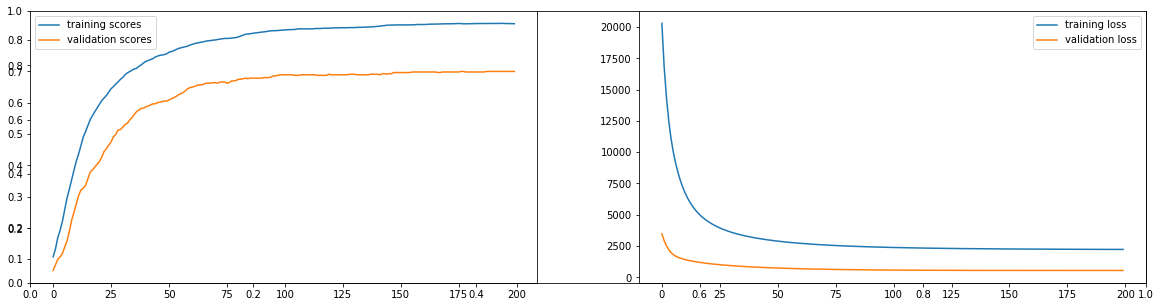

In [13]:
import numpy as np
fig = plt.figure(figsize=(20,5))
ax = plt.axes()

ax1 = fig.add_subplot(121);
ax1.plot(scores, label='training scores')
ax1.plot(scores_val, label='validation scores')
ax1.legend()

ax2 = fig.add_subplot(122);
ax2.plot(log_losses, label='training loss')
ax2.plot(log_losses_val, label='validation loss')
ax2.legend()

In [16]:
# NUMPY LOGISTIC REGRESSION WITH LBFGS

from src.models import LogisticRegressionNumpy

clf = LogisticRegressionNumpy(max_iter=200, num_classes=8, num_features=data.shape[1], lr=0.1, reg=0.05)
scores, log_losses, scores_val, log_losses_val = clf.fit(data, cls, data_val, cls_val, solver='lbfgs', lbfgs_m=30)

In [17]:
print('Training score: ', clf.score(data, cls))
print('Val score: ', clf.score(data_val, cls_val))
print('Test score: ', clf.score(data_test, cls_test))

Training score:  0.7922619047619047
Val score:  0.7732142857142857
Test score:  0.5517857142857143


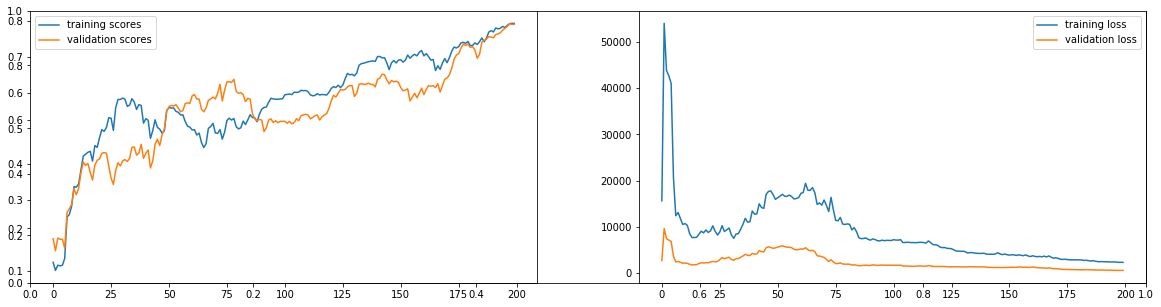

In [18]:
import numpy as np
fig = plt.figure(figsize=(20,5))
ax = plt.axes()

ax1 = fig.add_subplot(121);
ax1.plot(scores, label='training scores')
ax1.plot(scores_val, label='validation scores')
ax1.legend()

ax2 = fig.add_subplot(122);
ax2.plot(log_losses, label='training loss')
ax2.plot(log_losses_val, label='validation loss')
ax2.legend()

In [19]:
# KERAS BIDIRECTIONAL RNN

from src.models import BidirectionalRNNKeras

clf = BidirectionalRNNKeras(num_classes=8, num_features=data.shape[1], dropout_rate=0.4)
clf.fit(data, cls, data_val, cls_val, epochs=10, batch_size=20)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 3360 samples, validate on 560 samples
Epoch 1/10
3360/3360 [==============================] - 2s 469us/step - loss: 1.6017 - acc: 0.4491 - val_loss: 1.4569 - val_acc: 0.5018
Epoch 2/10
3360/3360 [==============================] - 0s 130us/step - loss: 1.3082 - acc: 0.5881 - val_loss: 1.2143 - val_acc: 0.5875
Epoch 3/10
3360/3360 [==============================] - 0s 126us/step - loss: 1.1930 - acc: 0.6280 - val_loss: 1.1656 - val_acc: 0.6036
Epoch 4/10
3360/3360 [==============================] - 0s 133us/step - loss: 1.0968 - acc: 0.6565 - val_loss: 1.0511 - val_acc: 0.6554
Epoch 5/10
3360/3360 [==============================] - 0s 139us/step - loss: 1.0299 - acc: 0.6670 - val_loss: 0.9589 - val_acc: 0.6929
Epoch 6/10
3360/3360 [================

In [20]:
print('Training score: ', clf.score(data, cls)[1])
print('Val score: ', clf.score(data_val, cls_val)[1])
print('Test score: ', clf.score(data_test, cls_test)[1])

3360/3360 [==============================] - 0s 42us/step
Training score:  0.9130952380952381
560/560 [==============================] - 0s 42us/step
Val score:  0.8553571428571428
560/560 [==============================] - 0s 57us/step
Test score:  0.5607142857142857


In [30]:
import tensorflow as tf

tf.reset_default_graph()

In [31]:
# TENSORFLOW BIDIRECTIONAL RNNs - Not Working yet

from src.models import BidirectionalRNNTf
, 
clf = BidirectionalRNNTf(dataset.largest_seq_len, max_iter=1000, num_classes=8, num_features=3, direction='both', dropout_keep_prob=0.4)
clf.fit(data, cls, seq_len, data_val, cls_val, seq_len_val, epochs=10, batch_size=60, lr=1e-2)

/home/neha/Documents/python-env/gesture-recog/lib/python3.5/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
  0%|          | 0/3360 [00:00<?, ?it/s]


Epoch No: 1
Train accuracy = 0.2568, loss = 1.8771
Val accuracy = 0.4017, loss = 1.5355
Model saved in path: checkpoints/model.ckpt


  0%|          | 0/3360 [00:00<?, ?it/s]


Epoch No: 2
Train accuracy = 0.4071, loss = 1.5088
Val accuracy = 0.5067, loss = 1.2786
Model saved in path: checkpoints/model.ckpt


  0%|          | 0/3360 [00:00<?, ?it/s]


Epoch No: 3
Train accuracy = 0.4598, loss = 1.3712
Val accuracy = 0.5333, loss = 1.1908
Model saved in path: checkpoints/model.ckpt


  0%|          | 0/3360 [00:00<?, ?it/s]


Epoch No: 4
Train accuracy = 0.4753, loss = 1.3366
Val accuracy = 0.5867, loss = 1.1317
Model saved in path: checkpoints/model.ckpt


  0%|          | 0/3360 [00:00<?, ?it/s]


Epoch No: 5
Train accuracy = 0.4940, loss = 1.3120
Val accuracy = 0.6167, loss = 1.0691
Model saved in path: checkpoints/model.ckpt


  0%|          | 0/3360 [00:00<?, ?it/s]


Epoch No: 6
Train accuracy = 0.4967, loss = 1.2849
Val accuracy = 0.5917, loss = 1.0670
Model saved in path: checkpoints/model.ckpt


  0%|          | 0/3360 [00:00<?, ?it/s]


Epoch No: 7
Train accuracy = 0.5003, loss = 1.2854
Val accuracy = 0.6033, loss = 1.0960
Model saved in path: checkpoints/model.ckpt


  0%|          | 0/3360 [00:00<?, ?it/s]


Epoch No: 8
Train accuracy = 0.5104, loss = 1.2452
Val accuracy = 0.5733, loss = 1.0959
Model saved in path: checkpoints/model.ckpt


  0%|          | 0/3360 [00:00<?, ?it/s]


Epoch No: 9
Train accuracy = 0.5295, loss = 1.2135
Val accuracy = 0.6217, loss = 1.0110
Model saved in path: checkpoints/model.ckpt


100%|██████████| 3360/3360 [00:02<00:00, 1414.07it/s]



Epoch No: 10
Train accuracy = 0.5134, loss = 1.2265
Val accuracy = 0.6233, loss = 0.9825
Model saved in path: checkpoints/model.ckpt


In [32]:
print('Training score: ', clf.score(data, cls, seq_len)[1])
print('Val score: ', clf.score(data_val, cls_val, seq_len_val)[1])
print('Test score: ', clf.score(data_test, cls_test, seq_len_test)[1])

INFO:tensorflow:Restoring parameters from checkpoints/model.ckpt
Model restored.
Training score:  0.5255952385209856
INFO:tensorflow:Restoring parameters from checkpoints/model.ckpt
Model restored.
Val score:  0.6285714209079742
INFO:tensorflow:Restoring parameters from checkpoints/model.ckpt
Model restored.
Test score:  0.526785712156977


INFO:tensorflow:Restoring parameters from checkpoints/model.ckpt
Model restored.


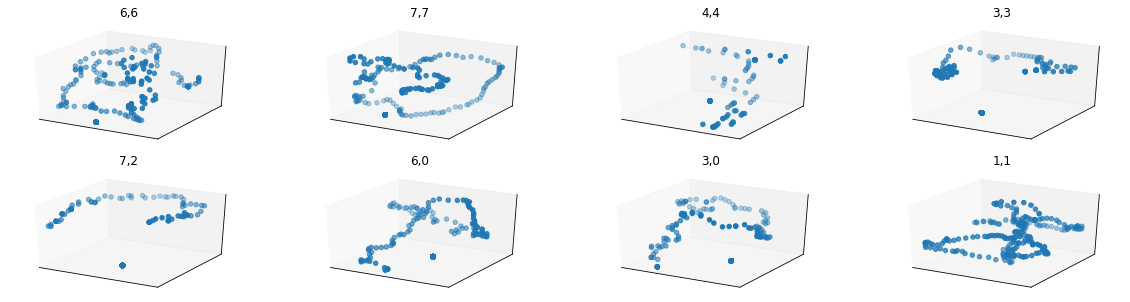

In [33]:
# TEST SAMPLES FROM THE LAST TRAINED MODEL

from src import config
model = str(clf).split('.')[-1].split(' ')[0]
import numpy as np
 
fig = plt.figure(figsize=(20, 5))

d = data_test
c = cls_test
s = seq_len_test
d = data_val
c = cls_val
s = seq_len_val


rd_idxs = np.random.choice(np.arange(d.shape[0]), 8, False)
if model == config.ModelType.BidirectionalRNNTf.value:
    prd_cls = clf.predict(d, c, s)
else:
    prd_cls = clf.predict(d)
d = d.reshape(d.shape[0], -1, 3)

for i in range(8):
    idx = rd_idxs[i]
    ax = fig.add_subplot(2, 4, i+1, projection='3d')
    ax.scatter3D(d[idx,:,0], d[idx,:,1], d[idx,:,2])
    ax.title.set_text(str(prd_cls[idx])+','+str(c[idx]))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

plt.show()

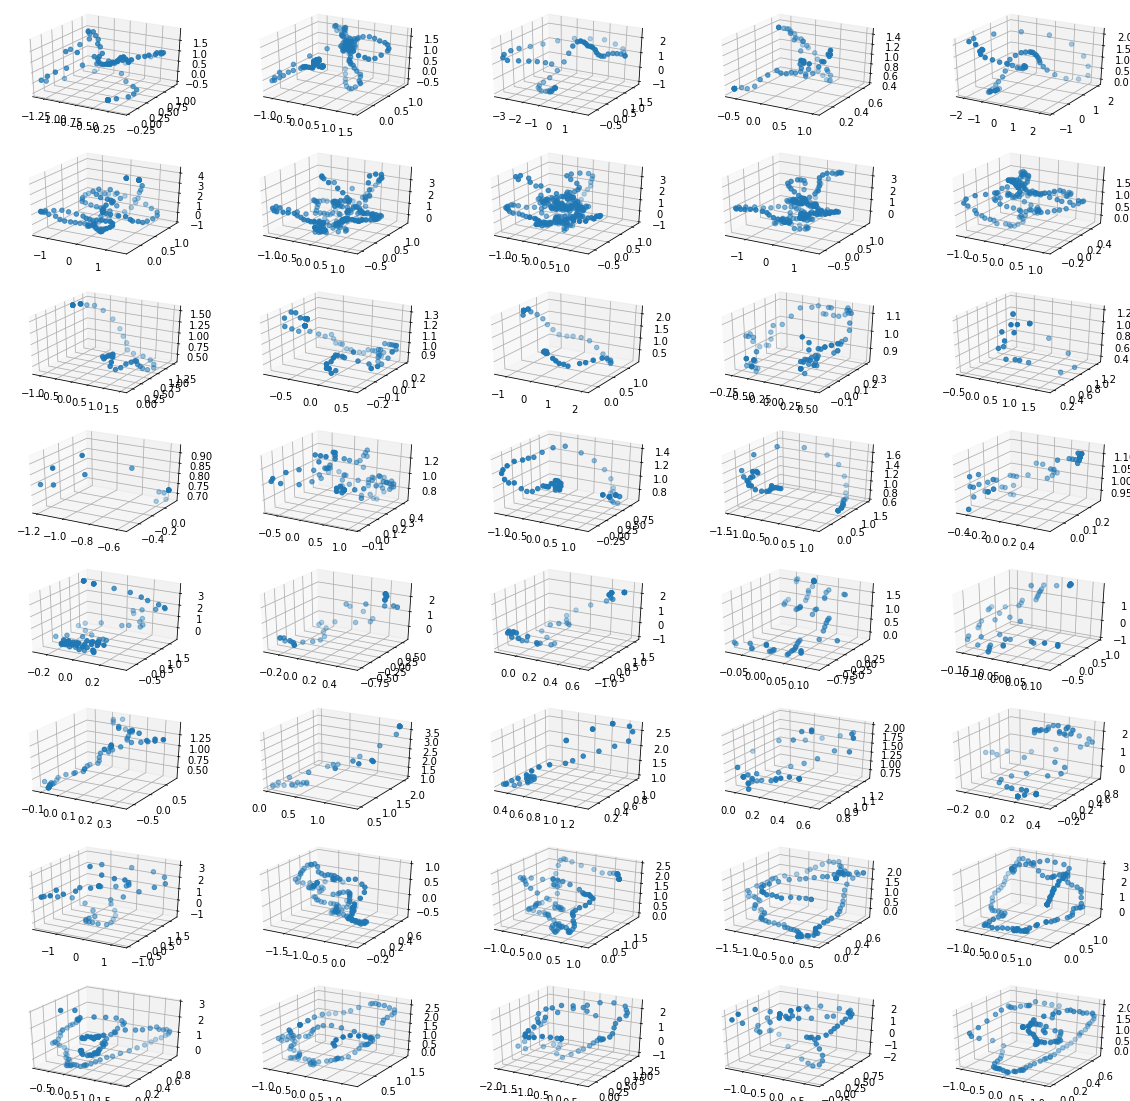

In [34]:
# VISUALIZE ACCELERATION DATA SAMPLES

import src.config as config
fig = plt.figure(figsize=(20, 20))

split = 'train'

for i in range(config.Num.classes.value):
    for j in range(5):
        dp = dataset.get_random_data_point_for_class(split, i)
        ax = fig.add_subplot(8, 5, (5*i)+j+1, projection='3d')
        ax.scatter3D(dp[:,0], dp[:,1], dp[:,2])

plt.show()

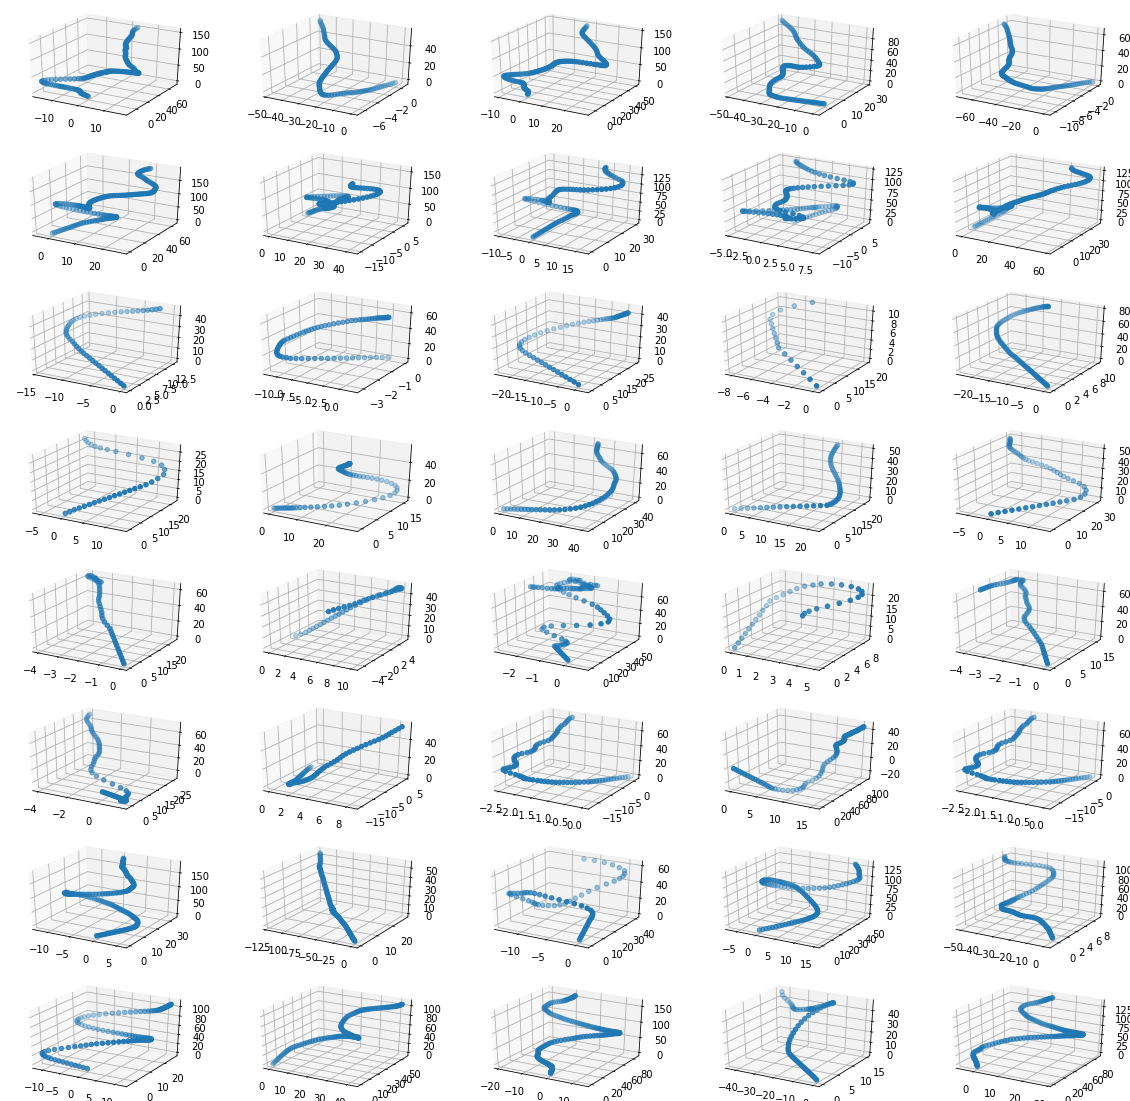

In [35]:
# VISUALIZE VELOCITY SAMPLES CALCULATED FROM ACCELERATION DATA

import src.config as config
fig = plt.figure(figsize=(20, 20))

split = 'train'

for i in range(config.Num.classes.value):
    for j in range(5):
        dp = dataset.get_random_data_point_for_class(split, i)
        dp = dataset.get_data_point_velocity(dp)
        ax = fig.add_subplot(8, 5, (5*i)+j+1, projection='3d')
        ax.scatter3D(dp[:,0], dp[:,1], dp[:,2])

plt.show()

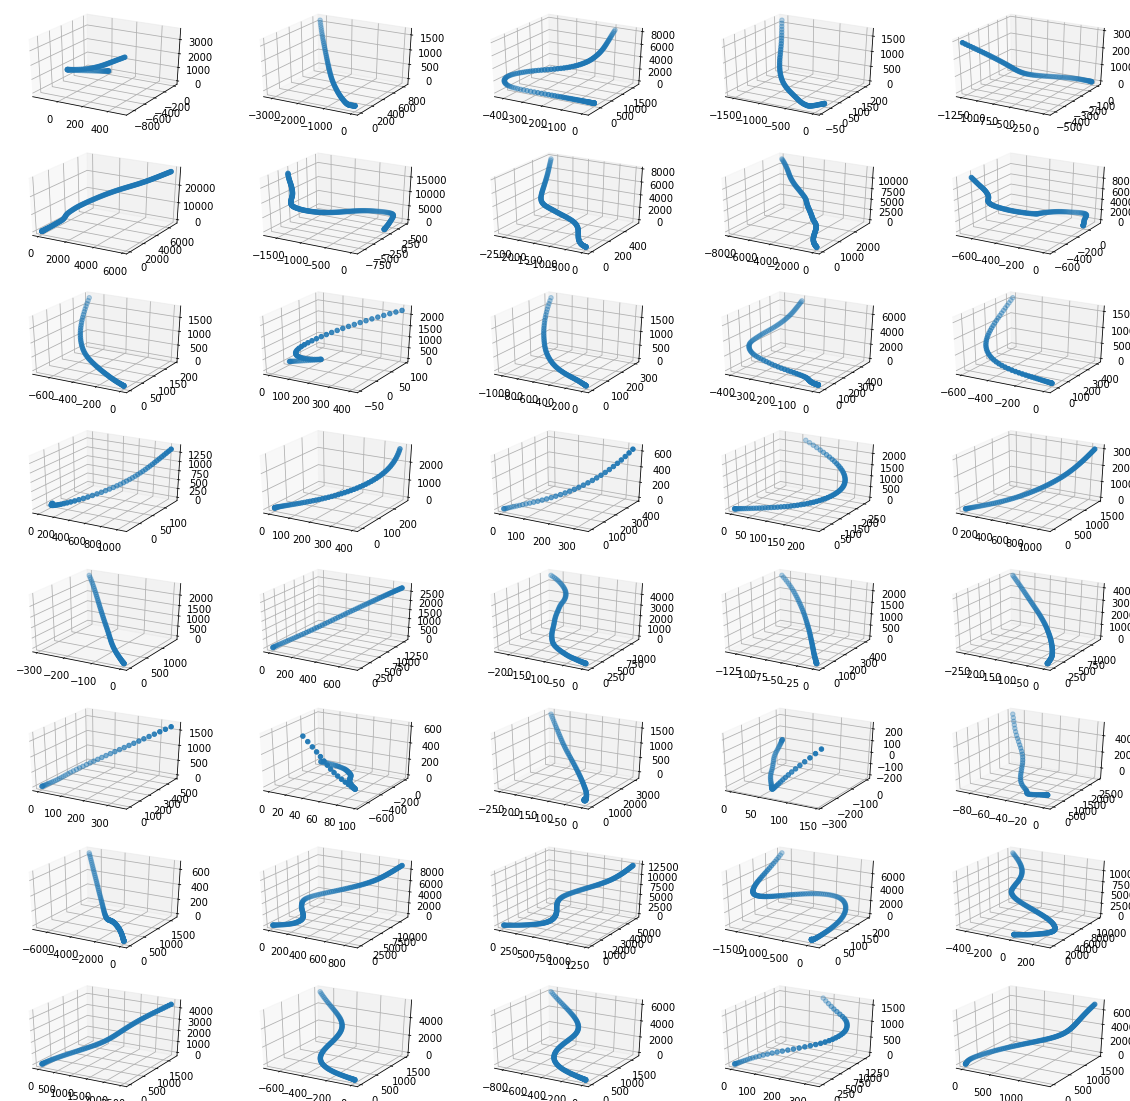

In [36]:
# VISUALIZE POSITION SAMPLES CALCULATED FROM ACCELERATION DATA

import src.config as config
fig = plt.figure(figsize=(20, 20))

split = 'train'

for i in range(config.Num.classes.value):
    for j in range(5):
        dp = dataset.get_random_data_point_for_class(split, i)
        dp = dataset.get_data_point_pos(dp)
        ax = fig.add_subplot(8, 5, (5*i)+j+1, projection='3d')
        ax.scatter3D(dp[:,0], dp[:,1], dp[:,2])

plt.show()

In [ ]:
# Test Code with iris
from sklearn.datasets import load_iris
from src.models import LogisticRegressionNumpy

X, y = load_iris(return_X_y=True)
clf = LogisticRegressionNumpy(max_iter=400, num_classes=3, num_features=X.shape[1], lr=0.001)

clf.fit(X, y)

clf.score(X, y)